# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [5]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [6]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [7]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3276,1,28.0,35600.0,3,0
413,1,45.0,39700.0,0,1
3063,0,24.0,64400.0,0,0
1730,0,30.0,39200.0,2,0
3580,0,37.0,39200.0,0,0
204,0,26.0,46700.0,0,0
4818,1,34.0,35100.0,1,0
644,1,20.0,34300.0,1,0
1759,0,35.0,35100.0,2,0
578,1,34.0,34900.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [9]:
# vamos a hacer los ajustes pertinentes en los datos que tenemos:

# Revisión una muestra de los datos
print("Muestra de los datos:")
display(df.sample(10))

# Revisamos la información general y tipos de datos
print("\nInformación del DataFrame:")
df.info()

# Cambiamos el tipo de dato de la columna 'age' a entero
df['age'] = df['age'].astype(int)

Muestra de los datos:


,gender,age,income,family_members,insurance_benefits
1775,1,18.0,48900.0,1,0
1282,0,43.0,31300.0,1,1
4447,1,20.0,38800.0,1,0
1618,1,18.0,45300.0,0,0
108,1,39.0,40100.0,2,0
1348,1,24.0,38700.0,2,0
4894,1,33.0,58400.0,0,0
4504,0,21.0,29300.0,1,0
3158,1,27.0,30000.0,3,0
1764,1,20.0,29300.0,2,0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [10]:
#Un vistazo a las estadísticas descriptivas:

print("\nInformación del DataFrame después de la conversión:")
df.info()
print("\nEstadísticas Descriptivas:")
display(df.describe())


Información del DataFrame después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB

Estadísticas Descriptivas:


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


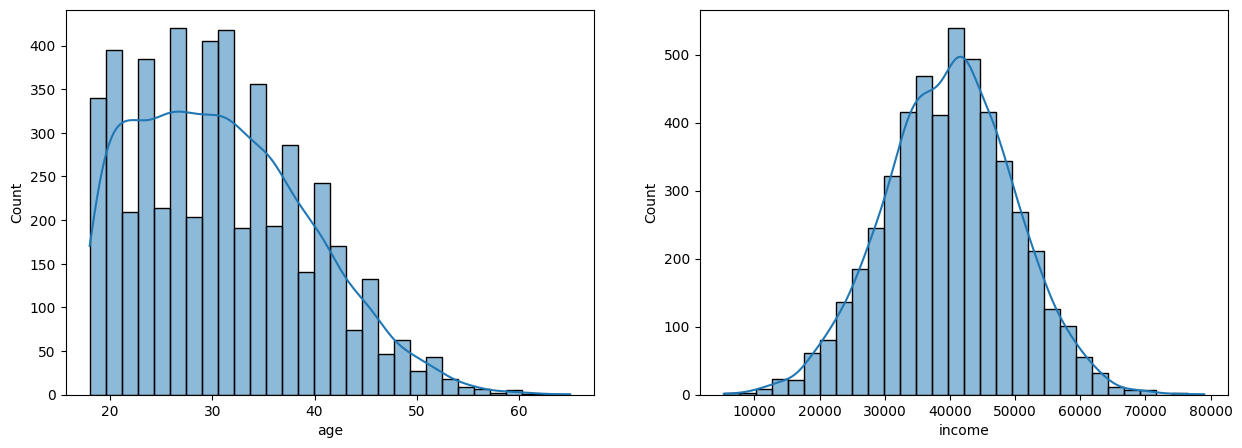

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[0])
sns.histplot(data=df, x='income', bins=30, kde=True, ax=axes[1])
plt.show()

En este caso, el salario se ajusta a una distribución normal. Pero en cuestión de la edad, y viendo el sesgo que tiene a la izquierda, estos datos nos hablan de una población jóven, en donde se esboza de una mejor manera la media de 30 años (misma que vemos en la descripción estadística).

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

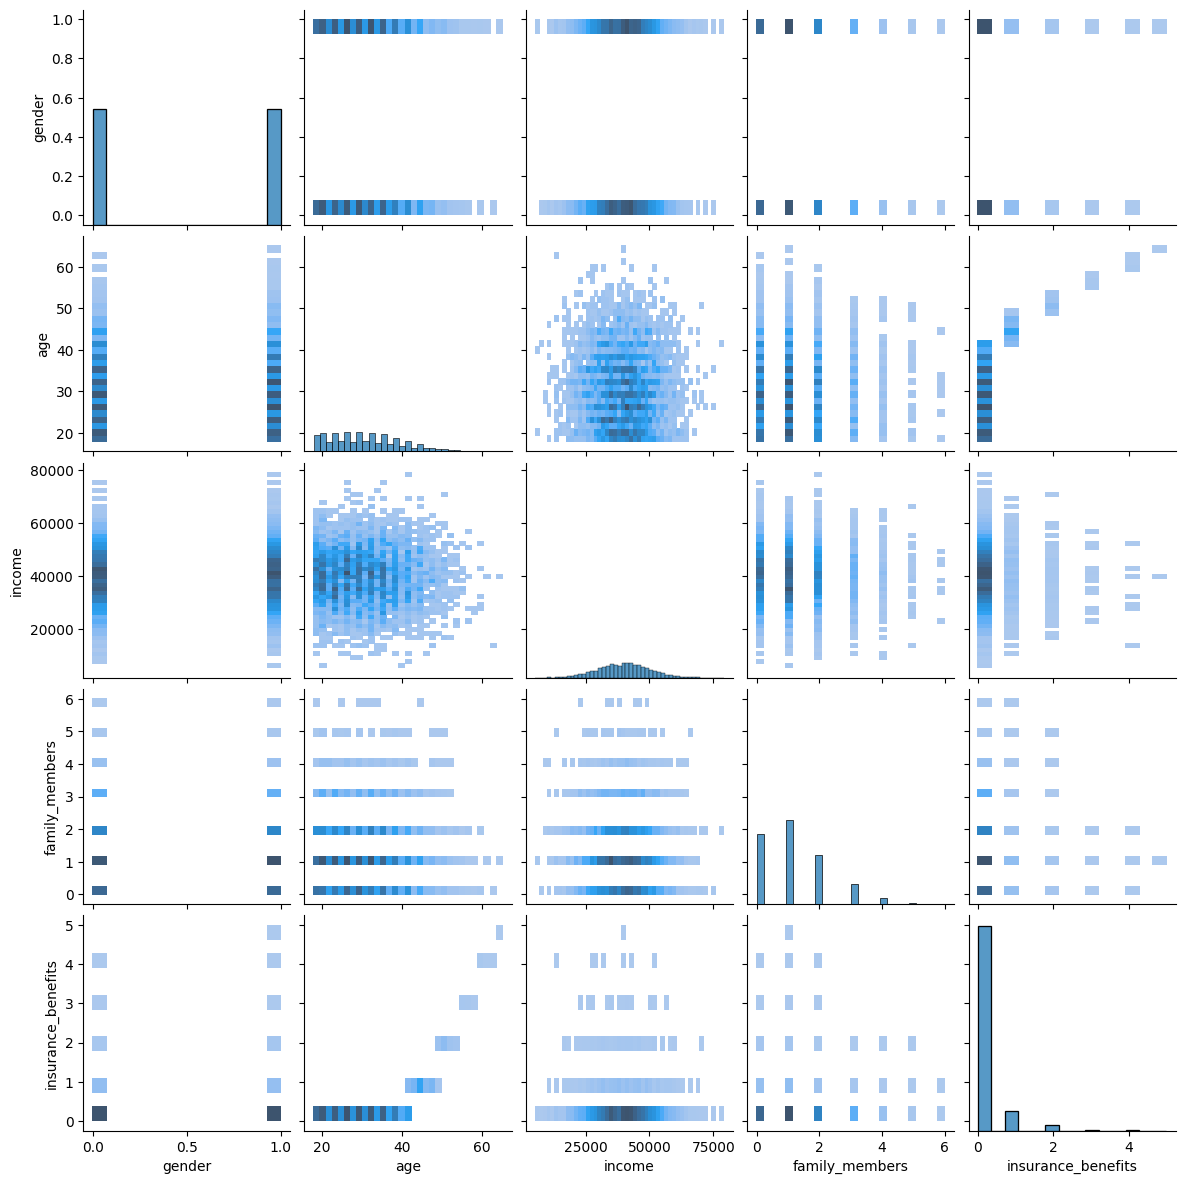

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.

Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.

Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:

def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: número de objetos para los que se buscan los vecinos más cercanos
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia
    """

    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res


Escalar datos.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())



In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4447,1.0,0.307692,0.491139,0.166667,0
408,0.0,0.276923,0.467089,0.000000,0
3348,0.0,0.384615,0.592405,0.166667,0
2580,0.0,0.353846,0.367089,0.333333,0
1404,0.0,0.661538,0.712658,0.333333,1


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

**Si afecta, en este caso se va directamente al rendimiento del algoritmo; esto lo podemos ver en la precisión** 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

**No deberían ser similares. En este caso también tenemos que seguir escalando, aunque la distancia Manhattan es menos susceptible a valores atípicos, y un poco más estable en cuanto a datos dispersos.**  

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.

Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestación del seguro puede definirse como

$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [23]:

# Creamos la variable objetivo para clasificación
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

# Dividimos los datos en conjuntos de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features_scaled, df['insurance_benefits_received'], test_size=0.3, random_state=12345
)

# Entrenamiento el clasificador k-NN
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(features_train, target_train)
predictions = knn_classifier.predict(features_test)

# Evaluación el modelo
f1_score = sklearn.metrics.f1_score(target_test, predictions)
print(f"Puntuación F1 del modelo k-NN: {f1_score:.4f}")

# Modelo con variables Dummy
dummy_model = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)
dummy_predictions = dummy_model.predict(features_test)
f1_dummy = sklearn.metrics.f1_score(target_test, dummy_predictions)
print(f"Puntuación F1 del modelo Dummy: {f1_dummy:.4f}")

Puntuación F1 del modelo k-NN: 0.9245
Puntuación F1 del modelo Dummy: 0.0000


Esto quiere decir que tenemos muchos clientes que reciben los beneficios y la prueba nos asegura que comete pocos errores al predecir falsos positivos. Planteo este código para esbozarlo de una manera más clara: 

In [32]:
# Calculamos el objetivo (1 si recibió beneficios, 0 si no)
df['insurance_benefits'] = (df['insurance_benefits'] > 0).astype(int)

# Ver desequilibrio de clases
print(df['insurance_benefits'].value_counts())

0    4436
1     564
Name: insurance_benefits, dtype: int64


# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [30]:
class MyLinearRegression:
    
    def __init__(self): 
        self.model = sklearn.linear_model.LinearRegression()
        self.rmse = None 
       
    def fit(self, X_train, y_train):  
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test):  
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):  
        predictions = self.predict(X_test)
        self.rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions))
        return self.rmse

        
#Construcción de la regresión

target = df['insurance_benefits'] 
features = df.drop('insurance_benefits', axis=1)

#Escalado de datos dentro de la regresión
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#División de datos
features_train, features_test, target_train, target_test = train_test_split(
    features_scaled, target, test_size=0.3, random_state=12345
)

#Creación del modelo y entrenamiento:
my_linear_model = MyLinearRegression()
my_linear_model.fit(features_train, target_train)

#Evaluación del modelo:

rmse_score = my_linear_model.evaluate(features_test, target_test)

print(f"El RMSE del 'insurance_benefits' como objetivo es: {rmse_score:.4f}")

El RMSE del 'insurance_benefits' como objetivo es: 0.3436


**Como podemos ver, las predicciones del modelo usado, tienen una discrepancia del 34.36% con respecto a las observaciones**

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [44]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [45]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [46]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [48]:
X = df[feature_names].values

np.random.seed(42)
P = np.random.rand(X.shape[1], X.shape[1])

#Nos aseguramos de que la matriz tenga inversa:

while np.linalg.det(P) == 0:
    P = np.random.rand(X.shape[1], X.shape[1])

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [58]:
# Calculamos la matriz inversa de P (esta es la "llave")
P_inv = np.linalg.inv(P)

# Multiplicar los datos ofuscados (X_prime) por la matriz inversa
# Esto revertirá la transformación y nos dará los datos originales.
X_recuperado = X_prime @ P_inv

# Para una mejor visualización, convertimos la matriz recuperada a un DataFrame
# Usamos las columnas originales para que sea fácil de leer.
feature_names = ['age', 'gender', 'income', 'family_members']
df_recuperado = pd.DataFrame(X_recuperado, columns=feature_names)

# Ajuste  de los tipos de datos para que coincidan con el original

df_recuperado['age'] = df_recuperado['age'].round().astype(int)
df_recuperado['gender'] = df_recuperado['gender'].round().astype(int)
df_recuperado['family_members'] = df_recuperado['family_members'].round().astype(int)
df_recuperado['income'] = df_recuperado['income']

#  Edad y los ingresos recuperados
print("Datos originales vs. Datos recuperados (primeras 5 filas)")
print("\nOriginal:")
display(df[['age', 'income']].head())

print("\nRecuperado de la transformación:")
display(df_recuperado[['age', 'income']].head())

# Para verificar que la recuperación fue exitosa en todo el conjunto de datos:
son_iguales = np.allclose(X, X_recuperado)
print(f"\n¿Son los datos originales y recuperados prácticamente idénticos? {son_iguales}")

Datos originales vs. Datos recuperados (primeras 5 filas)

Original:


,age,income
0,41,49600.0
1,46,38000.0
2,29,21000.0
3,21,41700.0
4,28,26100.0



Recuperado de la transformación:


,age,income
0,1,49600.0
1,0,38000.0
2,0,21000.0
3,0,41700.0
4,1,26100.0



¿Son los datos originales y recuperados prácticamente idénticos? True


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [54]:
X_recovered = X_prime @ np.linalg.inv(P)
print(X_recovered)

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 8.83315501e-13  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-9.16187765e-13  2.90000000e+01  2.10000000e+04 -4.79751961e-12]
 ...
 [-1.25077129e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]


Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [57]:
#Vamos viendo si los datos originales y los recuperados son los mismos
print("\n¿Son los datos originales y recuperados iguales?")
print(np.allclose(X, X_recovered))


¿Son los datos originales y recuperados iguales?
True


## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

### Sobre la relación entre $w$ y $w_p$

Sea $X \in \mathbb{R}^{m \times n}$ la matriz original y  
$P \in \mathbb{R}^{n \times n}$ una matriz invertible de ofuscación. Definimos:

$$
w = (X^T X)^{-1} X^T y,
\qquad
w_p = \bigl[(X P)^T (X P)\bigr]^{-1} (X P)^T y.
$$

Observamos que

$$
(XP)^T (XP)
= P^T \,X^T X\,P.
$$

Usando la propiedad $(AB)^{-1} = B^{-1} A^{-1}$, obtenemos

$$
\bigl(P^T X^T X\,P\bigr)^{-1}
= P^{-1}\,(X^T X)^{-1}\,(P^T)^{-1}.
$$

Por lo tanto:

$$
\begin{aligned}
w_p
&= P^{-1}(X^T X)^{-1}(P^T)^{-1}\,(XP)^T y \\[6pt]
&= P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y \\[6pt]
&= P^{-1}(X^T X)^{-1} X^T y \\[6pt]
&= P^{-1} \,w.
\end{aligned}
$$

---

#### Sobre los valores predichos con $w_p$

El vector de predicciones usando datos ofuscados es

$$
\hat y_p
= (X P)\,w_p
= X P\,\bigl(P^{-1}w\bigr)
= X\,\bigl(P\,P^{-1}\bigr)\,w
= X\,w
= \hat y.
$$

Por lo tanto, $\hat y_p = \hat y$: las predicciones no cambian.

---

### Implicaciones para la RECM

La raíz del error cuadrático medio se define como

$$
\mathrm{RECM}
= \sqrt{\frac{1}{m}\sum_{i=1}^{m} \bigl(y_i - \hat y_i\bigr)^2}.
$$

Como $\hat y_p = \hat y$, cada residuo  
$y_i - \hat y_{p,i} = y_i - \hat y_i$. De ello sigue:

- Los residuos permanecen idénticos.  
- La RECM no se ve alterada por la ofuscación.  

Con esto, podemos decir que, una transformación lineal invertible $P$ no modifica ni las predicciones $\hat y$ ni la calidad del ajuste medida por la RECM.

**Prueba analítica**

**Para esto usamos la prueba de invarianza de RECM**


Definimos la RECM como

$$
\mathrm{RECM} 
= \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat y_i)^2}
= \frac{\lVert y - \hat y\rVert_2}{\sqrt{m}}.
$$

Para los datos ofuscados, definimos de esta manera

$$
\mathrm{RECM}_p 
= \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat y_{p,i})^2}
= \frac{\lVert y - \hat y_p\rVert_2}{\sqrt{m}}.
$$

Como ya se demostró que $\hat y_p = \hat y$, entonces

$$
y - \hat y_p = y - \hat y.
$$

Por lo tanto,

$$
\mathrm{RECM}_p 
= \frac{\lVert y - \hat y\rVert_2}{\sqrt{m}}
= \mathrm{RECM}.
$$

Estas demostraciones sustentan el punto de la prueba de regresión lineal con ofiscación de datos de la parte siguiente. 

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [50]:
X_prime = X @ P

print(X_prime)

[[29822.90832948 35127.95868743  1024.28616408 48143.82395221]
 [22850.37974634 26914.1460433    785.06445437 36896.60188937]
 [12627.93978718 14874.04797481   433.95880496 20393.22600363]
 ...
 [20382.58415619 24007.20495591   699.33967881 32897.63432023]
 [19662.76516213 23158.99290502   675.66827178 31736.25691292]
 [24410.84498147 28753.27755851   838.27062846 39403.37499285]]


In [51]:
#Entrenamos al modelo con los datos ofuscados
features_train_obf, features_test_obf, target_train_obf, target_test_obf = train_test_split(
    X_prime, target_regression, test_size=0.3, random_state=12345
)

lr_obfuscated = sklearn.linear_model.LinearRegression()
lr_obfuscated.fit(features_train_obf, target_train_obf)
predictions_obf = lr_obfuscated.predict(features_test_obf)

In [52]:
#Comparación de RMSE:

rmse_obfuscated = np.sqrt(sklearn.metrics.mean_squared_error(target_test_obf, predictions_obf))
print(f"RMSE del modelo original (con datos no escalados): {rmse:.4f}") 
print(f"RMSE del modelo con datos ofuscados: {rmse_obfuscated:.4f}")

RMSE del modelo original (con datos no escalados): 0.2337
RMSE del modelo con datos ofuscados: 0.2337


# Conclusiones

**A lo largo de este proyecto se demostró la importante aplicación de muchas herramientas adquiridas a lo largo del curso, específicamente de cómo el machine learning puede ser aplicado para la propia resolución de problemas en las industrias cualesquiera.**

**Siquiendo este estudio, aplicamos técnicas propias que siguen un planteamiento estadístico riguroso, una aplicación directa en contexto de análisis económico (ya que las técnicas también se usan en el análisis econométrico), y gracias a esto, se puede lograr hacer una proyección financiera y de riesgo un poco más precisa.**

**Además, aplicando estas técnicas, podemos tomar decisiones basadas en datos y optimizar los recursos de las empresas (esto viéndolo desde un punto de vista general).**

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>